# Coding Task 1

## Anggota Kelompok
1. Kanafira Vanesha Putri   - 5027241010
2. Ardhi Putra Pradana      - 5027241022
3. Khumaidi Kharis Az-zacky - 5027241049
4. Imam Mahmud Dalil Fauzan - 5027241100

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../datasets/dataset_1.xlsx')
df
"""
Column name mapping

Tanggal          ->  date
Curah Hujan (mm) ->  rainfall
Penjualan A      ->  sale_a
Penjualan B      ->  sale_b
"""
df.columns = ['date', 'rainfall', 'sale_a', 'sale_b']
df

,date,rainfall,sale_a,sale_b
0,1,1.4,0,507
1,2,1.2,27,61
2,3,15.2,458,367
3,4,13.4,20,21
4,5,7.7,7,0
...,...,...,...,...
116,4,2.2,430,421
117,5,0.5,208,24
118,6,33.4,200,189
119,7,0.0,0,324


## Exploratory Data

In [115]:
def draw_patch_text(ax: plt.Axes, data: list, offset: int = 0):
    len_patches = len(list(ax.patches))
    assert len(data) == len_patches, f"Data length must be equal to the number of patches, expected {len_patches}, got {len(data)}"
    for idx, patch in enumerate(ax.patches):
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            patch.get_height() + offset,
            data[idx],
            fontsize=14,
            fontweight='bold',
            color='white',
            ha='center',
            va='bottom'
        )

In [140]:
"""
Mean

Mencari rata - rata dari setiap data penjualan dari produk A dan B
"""

def process_mean(ax: plt.Axes):
    mean_sale_a = df['sale_a'].mean()
    mean_sale_b = df['sale_b'].mean()
    data = {
        'Produk': ['A', 'B'],
        'Mean': [mean_sale_a, mean_sale_b]
    }

    ax.set_title(
        label="Rata - rata penjualan produk A dan B",
        size=20,
        pad=30
    )

    sns.barplot(
        ax=ax,
        data=data,
        x='Produk',
        y='Mean',
        palette="GnBu",
        hue='Produk',
    )

    ax.axhline(y=mean_sale_a, color='red', linewidth=2, linestyle='--')
    ax.axhline(y=mean_sale_b, color='red', linewidth=2, linestyle='--')

    draw_patch_text(ax=ax, data=[f'{mean_sale_a:.2f}', f'{mean_sale_b:.2f}'], offset=-50)

In [189]:
"""
Modus

Mencari modus dari setiap data penjualan dari produk A dan B
"""
def process_modus(ax: plt.Axes):
    mode_sale_a = df['sale_a'][df['sale_a'] != 0].mode().values[0]
    mode_sale_b = df['sale_b'][df['sale_b'] != 0].mode().values[0]
    amount_sale_a = df['sale_a'][df['sale_a'] == mode_sale_a].count().astype(int)
    amount_sale_b = df['sale_b'][df['sale_b'] == mode_sale_b].count().astype(int)
    data = {
        'Amount': [f'{mode_sale_a} (A)', f'{mode_sale_b} (B)'],
        'Mode': [amount_sale_a, amount_sale_b],
    }

    ax.set_title(
        label="Modus penjualan produk A dan B",
        size=20,
        pad=30
    )

    sns.barplot(
        ax=ax,
        data=data,
        x='Amount',
        y='Mode',
        palette="GnBu",
        hue='Amount',
    )

    ax.axhline(y=amount_sale_a, color='red', linestyle='--')
    ax.axhline(y=amount_sale_b, color='red', linestyle='--')

    draw_patch_text(ax=ax, data=[amount_sale_a, amount_sale_b], offset=-1)

In [192]:
"""
Median

Mencari median atau nilai tengah dari setiap data penjualan dari produk A dan B
"""
def process_median():
    median_sale_a = df['sale_a'].median().astype(int)
    median_sale_b = df['sale_b'].median().astype(int)
    
    df_median = pd.DataFrame({
        'Produk': ['A', 'B'],
        'Median': [median_sale_a, median_sale_b]
    })
    print(" Median penjualan produk A dan B ".center(50, "="))
    print(df_median.to_string(index=False))
    print(" Median penjualan produk A dan B ".center(50, "="))

======== Median penjualan produk A dan B =========
Produk  Median
     A      52
     B     157
======== Median penjualan produk A dan B =========


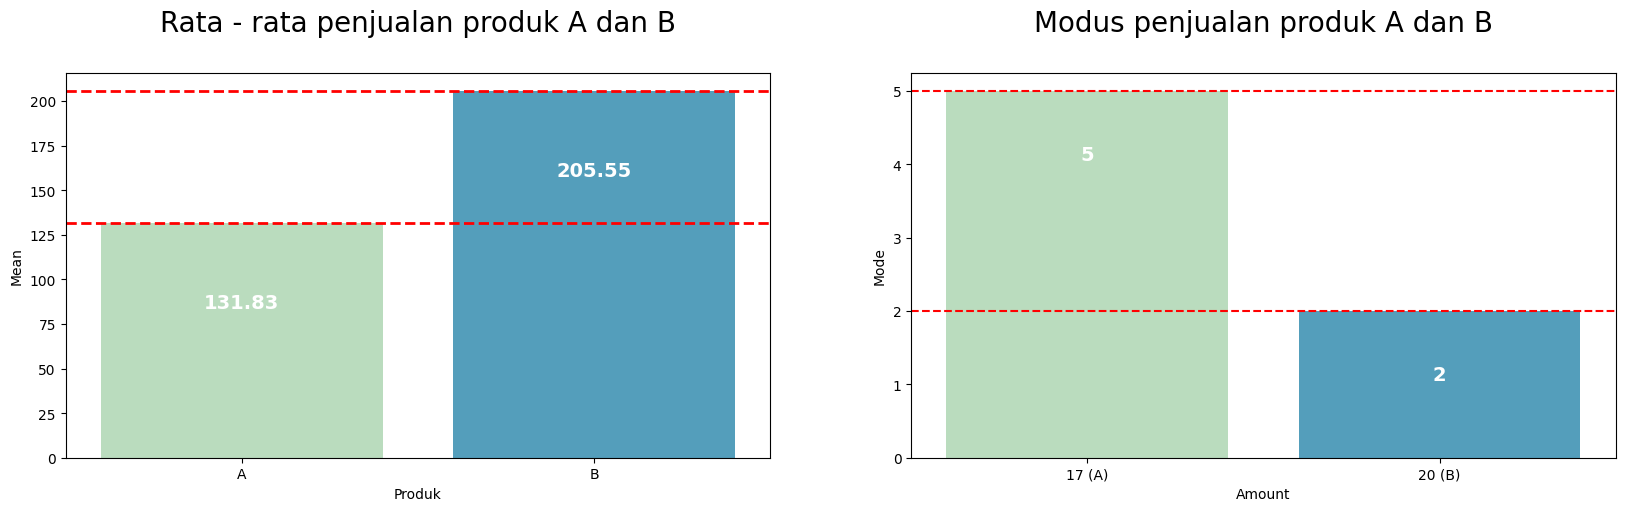

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
process_mean(ax1)
process_modus(ax2)
process_median()